In [1]:
from sklearn.decomposition import PCA
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')

In [7]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [30]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [31]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2, stratify=y)

In [32]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel = 'rbf',gamma =0.01,probability = True)
svc.fit(X_train,y_train)


SVC(gamma=0.01, probability=True)

In [39]:
y_predict = svc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7248677248677249

In [41]:
svc.score(X_train,y_train)

0.8082010582010583

In [42]:
svc.score(X_test,y_test)

0.7248677248677249

In [43]:
###model evaluation 
#confusion matrix
# classification report 
#kappa score
# roc and auc 


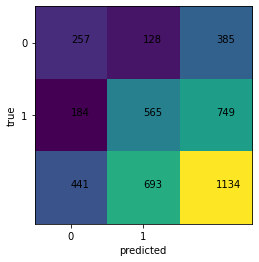

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)

y_prob = svc.predict_proba(X_test)

cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)

plt.imshow(cm)

for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [60]:
cm

array([[ 257,  184,  441],
       [ 128,  565,  693],
       [ 385,  749, 1134]])

In [70]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predict,target_names = ['males','female'],output_dict=True)
pd.DataFrame(cr)

,males,female,accuracy,macro avg,weighted avg
precision,0.667532,0.754339,0.724868,0.710936,0.720581
recall,0.582766,0.815296,0.724868,0.699031,0.724868
f1-score,0.622276,0.783634,0.724868,0.702955,0.720884
support,441.000000,693.000000,0.724868,1134.000000,1134.000000


In [72]:
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

In [73]:
auc_s = metrics.auc(fpr,tpr)

In [74]:
model_tune = SVC()
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,20,30,50,100],'kernel':['rbf','poly'],'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],'coef0':[0,1],}

In [77]:
model_grid = GridSearchCV(model_tune,param_grid= param_grid,scoring='accuracy',cv = 5,verbose = 1)

In [78]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 14.6min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [79]:
model_best = SVC(C= 30,kernel = 'rbf',gamma = 0.002)

model_best.fit(X_train,y_train)
model_best.score(X_test,y_test)

0.7222222222222222

In [84]:
import pickle 
pickle.dump(model_best,open('./model/model_svm.pickle','wb'))
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))